## How to slice a raster using a geojson

epsg:4326
epsg:4326
epsg:4326
epsg:4326
epsg:4326
epsg:4326


NameError: name 'raster' is not defined

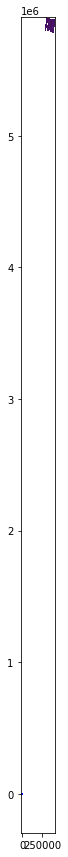

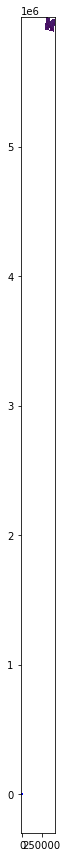

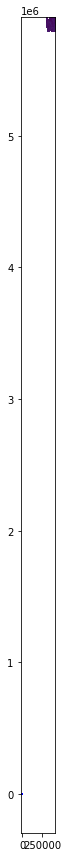

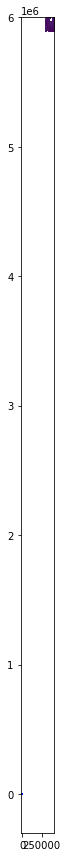

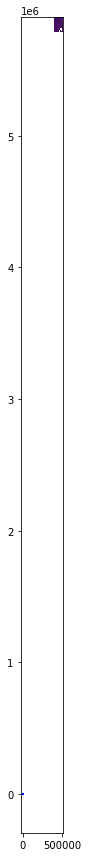

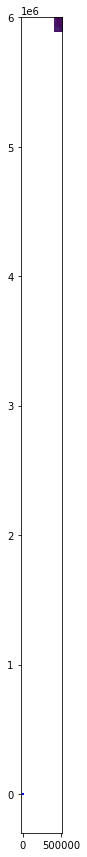

In [27]:
import json
import imageio as iio
from pathlib import Path

import sys
from glob import glob
from osgeo import ogr, gdal
from osgeo import gdalconst
import subprocess

import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap, BoundaryNorm
import numpy as np

import seaborn as sns

import geopandas as gpd
import pycrs
import fiona
from fiona.crs import from_epsg
from shapely.geometry import box
from shapely.geometry import Point
import shapely.geometry as geoms

import rasterio as rio
from rasterio.plot import show
import rasterio.warp
import rasterio.shutil
# from rasterio.warp import calculate_default_transform, reproject, Resampling
# from rasterio.plot import plotting_extent
# from rasterio.plot import show_hist
# from rasterio.mask import mask
# from rasterio.merge import merge
# from rasterio import Affine, MemoryFile
# from rasterio.enums import Resampling
# from rasterio import plot
#
# import rasterstats as rs
# import georasters as gr
# from rastertodataframe import raster_to_dataframe
#
# import earthpy.spatial as es
# import earthpy.plot as ep
# import earthpy as et
#
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn import metrics
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_predict
# from sklearn.model_selection import cross_validate

def temporal_merge(images_paths: list, aoi: dict):
    """

    :param images_paths:
    :param aoi:
    :return:
    """
    pass

def spatial_merge(images_paths: list, aoi_path):
    """
    combine a list of images which cover different areas but overlap to a single image
    https://zia207.github.io/geospatial-python.io/lesson_06_working-with-raster-data.html#Clipping
    :param images_paths:
    :param aoi:
    :return:
    """
    images = list()
    for file in images_paths:
        #im = iio.imread(file)
        #images.append(im)
        raster_file = rio.open(file)

        aoi = gpd.GeoDataFrame.from_file(aoi_path)
        print(aoi.crs)
        # import rasterio
        # Plot them

        fig, ax = plt.subplots(figsize=(5, 15))
        rasterio.plot.show(raster_file, ax=ax)
        aoi.plot(ax=ax, facecolor='none', edgecolor='blue')
        #rasterio.plot.show(raster_file)
        #raster_file.plot(facecolor='none', edgecolor='blue')


    return raster


images = [
    "/media/christian/2TB/HNEE/GIS/tmp/mosaic/32UQD/202107/60/mosaic_R60m_B03.tif", 
    "/media/christian/2TB/HNEE/GIS/tmp/mosaic/32UQE/202107/60/mosaic_R60m_B04.tif",
    "/media/christian/2TB/HNEE/GIS/tmp/mosaic/33UUU/202107/60/mosaic_R60m_B04.tif",
    "/media/christian/2TB/HNEE/GIS/tmp/mosaic/33UUV/202107/60/mosaic_R60m_B04.tif",
    "/media/christian/2TB/HNEE/GIS/tmp/mosaic/33UVU/202107/60/mosaic_R60m_B04.tif",
    "/media/christian/2TB/HNEE/GIS/tmp/mosaic/33UVV/202107/60/mosaic_R60m_B04.tif",
         
         ]
aoi_path = "/home/christian/work/hnee/programming_2_exam/area_of_interest/schorfheide.geojson"
# with open(aoi_path) as f:
#     geojson_data = json.loads(f.read())
#     geojson_data = geojson_data.get("features")[0].get("geometry")


raster = spatial_merge(images_paths=images, aoi_path=aoi_path)


In [13]:
def getFeatures(gdf):
    """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
    import json
    return [json.loads(gdf.to_json())['features'][0]['geometry']]

In [15]:
coords = getFeatures(raster)
print(coords)

[{'type': 'Polygon', 'coordinates': [[[13.788528442382812, 52.80981786421015], [13.825607299804688, 52.80981786421015], [13.825607299804688, 52.82807629652413], [13.788528442382812, 52.82807629652413], [13.788528442382812, 52.80981786421015]]]}]


In [16]:
out_img, out_transform = mask(dataset=GP_DEM, shapes=coords, crop=True)

NameError: name 'mask' is not defined

In [42]:
import os
import rasterio
from rasterio.plot import show
from rasterio.plot import show_hist
from rasterio.mask import mask
from shapely.geometry import box
import geopandas as gpd
from fiona.crs import from_epsg
import pycrs

%matplotlib inline


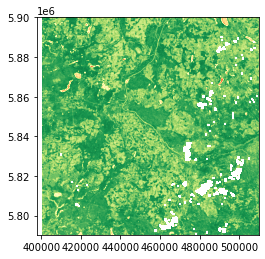

<AxesSubplot:>

In [79]:
# Input raster
fp = "/media/christian/2TB/HNEE/GIS/tmp/mosaic/33UVU/202107/60/mosaic_R60m_NDVI.tif"
# Read the data
data = rasterio.open(fp)

# Visualize the NIR band
show((data, 1), cmap='RdYlGn')

In [80]:
# Project the Polygon into same CRS as the grid
aoi_path = "/home/christian/work/hnee/programming_2_exam/area_of_interest/schorfheide.geojson"
geo = gpd.GeoDataFrame.from_file(aoi_path)
print(f"before: {geo.crs}")
geo = geo.to_crs(crs=data.crs.data)

# Print crs
print(f"after: {geo.crs}")

before: epsg:4326
after: +init=epsg:32633 +type=crs


/home/christian/anaconda3/envs/programming_2_exam/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [81]:
def getFeatures(gdf):
    """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
    import json
    return [json.loads(gdf.to_json())['features'][0]['geometry']]

In [82]:
coords = getFeatures(geo)
print(coords)

[{'type': 'Polygon', 'coordinates': [[[432528.0045397955, 5889968.721595427], [432537.05161713215, 5889953.968820307], [432561.6218548892, 5889928.880089861], [432668.1123712604, 5889820.925549513], [432790.27753908624, 5889698.555979998], [433011.94481495174, 5889476.754056711], [433104.008676323, 5889376.295991503], [433287.81528104487, 5889168.512652899], [433502.8018037952, 5888925.542348542], [433705.27225751913, 5888702.551520935], [433765.1370970536, 5888637.037556339], [433815.4419446924, 5888581.802156553], [433826.69452120655, 5888562.5997787], [433834.67724865087, 5888546.994054132], [433848.7543743941, 5888504.605970828], [433869.9921900234, 5888440.51351167], [433936.18315921514, 5888241.594407791], [434019.60716559633, 5887984.986567366], [434135.5221307298, 5887645.084359214], [434225.82622208324, 5887363.9765338395], [434246.2992836728, 5887299.637892007], [434233.26024674205, 5887213.765234701], [434210.4259912732, 5887061.834281643], [434183.1083799033, 5886867.200132

In [83]:
# Clip the raster with Polygon
out_img, out_transform = mask(dataset=data, shapes=coords, crop=True)

In [84]:
out_meta = data.meta.copy()
print(out_meta)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': 0.0, 'width': 1868, 'height': 1830, 'count': 1, 'crs': CRS.from_epsg(32633), 'transform': Affine(60.0, 0.0, 397664.0,
       0.0, -60.0, 5900058.0)}


In [85]:

# Parse EPSG code
epsg_code = int(data.crs.data['init'][5:])
print(epsg_code)

32633


In [86]:
pycrs.parse.from_epsg_code(epsg_code).to_proj4()

'+proj=utm +datum=WGS84 +ellps=WGS84 +a=6378137.0 +rf=298.257223563 +pm=0  +units=m +axis=enu +no_defs'

In [87]:
out_meta.update({"driver": "GTiff",
                 "height": out_img.shape[1],
                 "width": out_img.shape[2],
                 "transform": out_transform,
                 #"crs": pycrs.parse.from_epsg_code(epsg_code).to_proj4()}
                 "crs": data.crs
                })


In [88]:
out_tif = "/tmp/clipped"
with rasterio.open(out_tif, "w", **out_meta) as dest:
        dest.write(out_img)

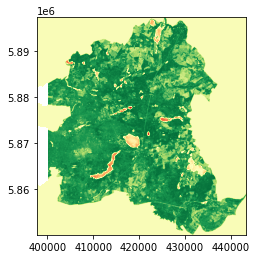

<AxesSubplot:>

In [89]:
clipped = rasterio.open(out_tif)

# Visualize
show((clipped, 1), cmap='RdYlGn')

before: epsg:4326
after: +init=epsg:32633 +type=crs


/home/christian/anaconda3/envs/programming_2_exam/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


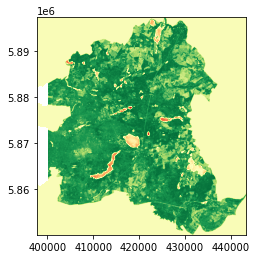

<AxesSubplot:>

In [91]:
def getFeatures(gdf):
    """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
    import json
    return [json.loads(gdf.to_json())['features'][0]['geometry']]

def clipp_image(input_path, aoi_path, output_path):
    import os
    import rasterio
    from rasterio.plot import show
    from rasterio.plot import show_hist
    from rasterio.mask import mask
    from shapely.geometry import box
    import geopandas as gpd
    from fiona.crs import from_epsg
    import pycrs


    # Read the data
    data = rasterio.open(fp)

    # Visualize the NIR band
    # show((data, 1), cmap='RdYlGn')
    
    # Project the Polygon into same CRS as the grid
    geo = gpd.GeoDataFrame.from_file(aoi_path)
    print(f"before: {geo.crs}")
    geo = geo.to_crs(crs=data.crs.data)

    # Print crs
    print(f"after: {geo.crs}")
    
    coords = getFeatures(geo)
    # print(coords)
    
    # Clip the raster with Polygon
    out_img, out_transform = mask(dataset=data, shapes=coords, crop=True)
    out_meta = data.meta.copy()
    # print(out_meta)
    
    out_meta.update({"driver": "GTiff",
                 "height": out_img.shape[1],
                 "width": out_img.shape[2],
                 "transform": out_transform,
                 "crs": data.crs
                })


    with rasterio.open(out_tif, "w", **out_meta) as dest:
            dest.write(out_img)
    
# Input raster
fp = "/media/christian/2TB/HNEE/GIS/tmp/mosaic/33UVU/202107/60/mosaic_R60m_NDVI.tif"
aoi_path = "/home/christian/work/hnee/programming_2_exam/area_of_interest/schorfheide.geojson"
out_tif = "/tmp/clipped"

clipp_image(input_path=fp, aoi_path=aoi_path, output_path=out_tif)

clipped = rasterio.open(out_tif)

# Visualize
show((clipped, 1), cmap='RdYlGn')

In [92]:
dem_fps = [
    "/media/christian/2TB/HNEE/GIS/tmp/mosaic/33UVU/202102/60/mosaic_R60m_NDVI.tif"
    "/media/christian/2TB/HNEE/GIS/tmp/mosaic/33UVV/202011/60/mosaic_R60m_NDVI.tif"
]

In [93]:
# List for the source files
src_files_to_mosaic = []

# Iterate over raster files and add them to source -list in 'read mode'
for fp in dem_fps:
    src = rasterio.open(fp)
    src_files_to_mosaic.append(src)

src_files_to_mosaic

RasterioIOError: /media/christian/2TB/HNEE/GIS/tmp/mosaic/33UVU/202102/60/mosaic_R60m_NDVI.tif/media/christian/2TB/HNEE/GIS/tmp/mosaic/33UVV/202102/60/mosaic_R60m_NDVI.tif: Not a directory

IndexError: list index out of range

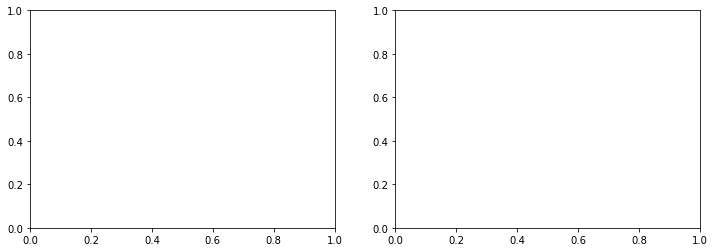

In [97]:

import matplotlib.pyplot as plt
%matplotlib inline

# Create 4 plots next to each other
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))

# Plot first four files
show(src_files_to_mosaic[0], ax=ax1)
show(src_files_to_mosaic[1], ax=ax2)

# Do not show y-ticks values in last three axis
for ax in [ax2]:
    ax.yaxis.set_visible(False)

In [ ]:
# Merge function returns a single mosaic array and the transformation info
mosaic, out_trans = merge(src_files_to_mosaic)

# Plot the result
show(mosaic, cmap='terrain')